# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_TapTapLite_1.csv")
df.head()

,userName,score,at,content
0,Didik Purwanto,5,2024-06-09 01:34:15,Aplikasi nya keren wak
1,Reza Arianto,4,2024-06-08 17:50:43,Lumayan apk nya
2,Aurora Athalia kurniawan,5,2024-06-08 11:55:22,Aplikasi nya sangat bagus
3,Neneng Yeti M,5,2024-06-08 09:28:31,Lah kok ga bisa download MLBB beta harus downl...
4,Whitetophat,5,2024-06-08 06:30:27,Mantap min bisa download game yang ga support


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Aplikasi nya keren wak,Didik Purwanto,2024-06-09 01:34:15
1,Lumayan apk nya,Reza Arianto,2024-06-08 17:50:43
2,Aplikasi nya sangat bagus,Aurora Athalia kurniawan,2024-06-08 11:55:22
3,Lah kok ga bisa download MLBB beta harus downl...,Neneng Yeti M,2024-06-08 09:28:31
4,Mantap min bisa download game yang ga support,Whitetophat,2024-06-08 06:30:27
...,...,...,...
995,Banyak game,Zayn Kurniadi,2023-09-23 06:53:05
996,Good,Ape Barlet,2023-09-22 15:22:02
997,Aplikasi nya bagus,Kevin Lie,2023-09-21 23:46:31
998,Oke,Segaff Wine,2023-09-21 08:09:06


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   1000 non-null   object
 1   userName  1000 non-null   object
 2   at        1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,1000,1000,1000
unique,645,999,1000
top,Bagus,Muhammad Nurdandi,2024-06-09 01:34:15
freq,119,2,1


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(1000, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(645, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,aplikasi nya keren wak,Didik Purwanto,2024-06-09 01:34:15
1,lumayan apk nya,Reza Arianto,2024-06-08 17:50:43
2,aplikasi nya sangat bagus,Aurora Athalia kurniawan,2024-06-08 11:55:22
3,lah kok ga bisa download mlbb beta harus downl...,Neneng Yeti M,2024-06-08 09:28:31
4,mantap min bisa download game yang ga support,Whitetophat,2024-06-08 06:30:27
...,...,...,...
992,waduh,Aditya Punuh,2023-09-23 14:35:10
993,bagus banyak game yg ku suka ada di sini,Kulle03 Kulle 30,2023-09-23 12:34:38
994,party animal,DELINA RIKUMAHU,2023-09-23 11:53:02
995,banyak game,Zayn Kurniadi,2023-09-23 06:53:05


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,aplikasi nya keren wak,Didik Purwanto,2024-06-09 01:34:15
1,lumayan aplikasi nya,Reza Arianto,2024-06-08 17:50:43
2,aplikasi nya sangat bagus,Aurora Athalia kurniawan,2024-06-08 11:55:22
3,lah kenapa ga bisa download mlbb beta harus do...,Neneng Yeti M,2024-06-08 09:28:31
4,mantap min bisa download game yang ga support,Whitetophat,2024-06-08 06:30:27
...,...,...,...
992,waduh,Aditya Punuh,2023-09-23 14:35:10
993,bagus banyak game yang ku suka ada di sini,Kulle03 Kulle 30,2023-09-23 12:34:38
994,party animal,DELINA RIKUMAHU,2023-09-23 11:53:02
995,banyak game,Zayn Kurniadi,2023-09-23 06:53:05


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.8 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,aplikasi nya keren wak,Didik Purwanto,2024-06-09 01:34:15
1,lumayan aplikasi nya,Reza Arianto,2024-06-08 17:50:43
2,aplikasi nya sangat bagus,Aurora Athalia kurniawan,2024-06-08 11:55:22
3,lah ga download mlbb beta download versi full ...,Neneng Yeti M,2024-06-08 09:28:31
4,mantap min download game ga support,Whitetophat,2024-06-08 06:30:27
...,...,...,...
992,waduh,Aditya Punuh,2023-09-23 14:35:10
993,bagus banyak game ku suka di sini,Kulle03 Kulle 30,2023-09-23 12:34:38
994,party animal,DELINA RIKUMAHU,2023-09-23 11:53:02
995,banyak game,Zayn Kurniadi,2023-09-23 06:53:05


In [18]:
# 3. Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                            [aplikasi, nya, keren, wak]
1                               [lumayan, aplikasi, nya]
2                         [aplikasi, nya, sangat, bagus]
3      [lah, ga, download, mlbb, beta, download, vers...
4             [mantap, min, download, game, ga, support]
                             ...                        
992                                              [waduh]
993            [bagus, banyak, game, ku, suka, di, sini]
994                                      [party, animal]
995                                       [banyak, game]
999                              [aplikasi, kasi, bagus]
Name: content, Length: 645, dtype: object

In [19]:
# # 4. Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_TapTapLite_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_TapTapLite_1.csv', encoding = 'latin1')
df_clean

,content
0,aplikasi nya keren wak
1,lumayan aplikasi nya
2,aplikasi nya sangat bagus
3,lah ga download mlbb beta download versi full ...
4,mantap min download game ga support
...,...
640,waduh
641,bagus banyak game ku suka di sini
642,party animal
643,banyak game


# **Translate**

In [21]:
# # Menginstall Library easynmt
# !pip install -U easynmt

In [22]:
# import pandas as pd
# from easynmt import EasyNMT

In [23]:
# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_TapTapLite_1.csv', encoding='latin1')

In [24]:
# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [25]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [26]:
# df2 = df_clean.fillna(method = 'pad')
# df2

In [27]:
# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_TapTapLite_1.csv')

In [28]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_TapTapLite_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,aplikasi nya keren wak,"fontcolor="" # FFFF00""the appwascool fontcolor=..."
1,1,lumayan aplikasi nya,Not bad.
2,2,aplikasi nya sangat bagus,The app is very good.
3,3,lah ga download mlbb beta download versi full ...,"fontcolor="" # FFFF00""not downloadmlbb beta dow..."
4,4,mantap min download game ga support,Persistent min download game ga support
...,...,...,...
640,640,waduh,Ouch!
641,641,bagus banyak game ku suka di sini,Good. A lot of my games love it here.
642,642,party animal,Animal party
643,643,banyak game,lots of games.


# **Labeling**

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_TapTapLite_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,aplikasi nya keren wak,"fontcolor="" # FFFF00""the appwascool fontcolor=..."
1,1,lumayan aplikasi nya,Not bad.
2,2,aplikasi nya sangat bagus,The app is very good.
3,3,lah ga download mlbb beta download versi full ...,"fontcolor="" # FFFF00""not downloadmlbb beta dow..."
4,4,mantap min download game ga support,Persistent min download game ga support
...,...,...,...
640,640,waduh,Ouch!
641,641,bagus banyak game ku suka di sini,Good. A lot of my games love it here.
642,642,party animal,Animal party
643,643,banyak game,lots of games.


In [30]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [31]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 365
Netral = 230
Negatif = 50

Total Data Seluruhnya : 645


In [33]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,aplikasi nya keren wak,"fontcolor="" # FFFF00""the appwascool fontcolor=...",Netral
1,1,lumayan aplikasi nya,Not bad.,Positif
2,2,aplikasi nya sangat bagus,The app is very good.,Positif
3,3,lah ga download mlbb beta download versi full ...,"fontcolor="" # FFFF00""not downloadmlbb beta dow...",Positif
4,4,mantap min download game ga support,Persistent min download game ga support,Negatif
...,...,...,...,...
640,640,waduh,Ouch!,Netral
641,641,bagus banyak game ku suka di sini,Good. A lot of my games love it here.,Positif
642,642,party animal,Animal party,Netral
643,643,banyak game,lots of games.,Netral


In [34]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,aplikasi nya keren wak,"fontcolor="" # FFFF00""the appwascool fontcolor=...",Netral
1,lumayan aplikasi nya,Not bad.,Positif
2,aplikasi nya sangat bagus,The app is very good.,Positif
3,lah ga download mlbb beta download versi full ...,"fontcolor="" # FFFF00""not downloadmlbb beta dow...",Positif
4,mantap min download game ga support,Persistent min download game ga support,Negatif
...,...,...,...
640,waduh,Ouch!,Netral
641,bagus banyak game ku suka di sini,Good. A lot of my games love it here.,Positif
642,party animal,Animal party,Netral
643,banyak game,lots of games.,Netral


# **Visualisasi**


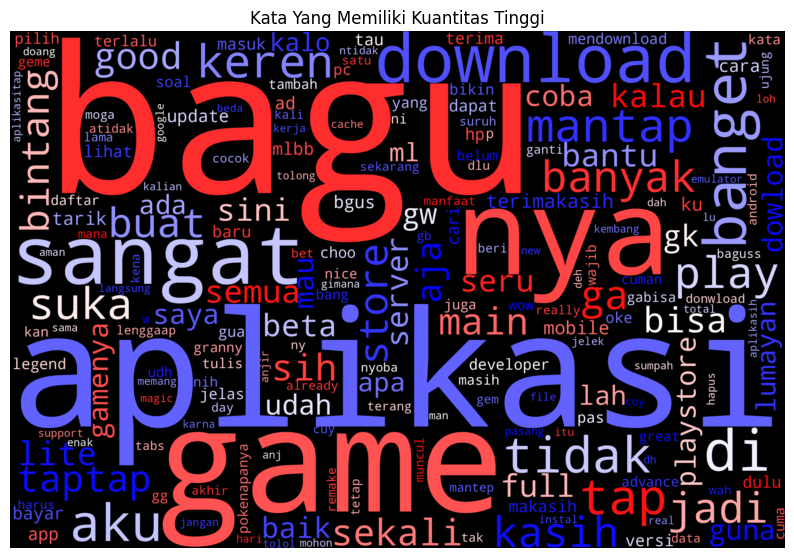

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


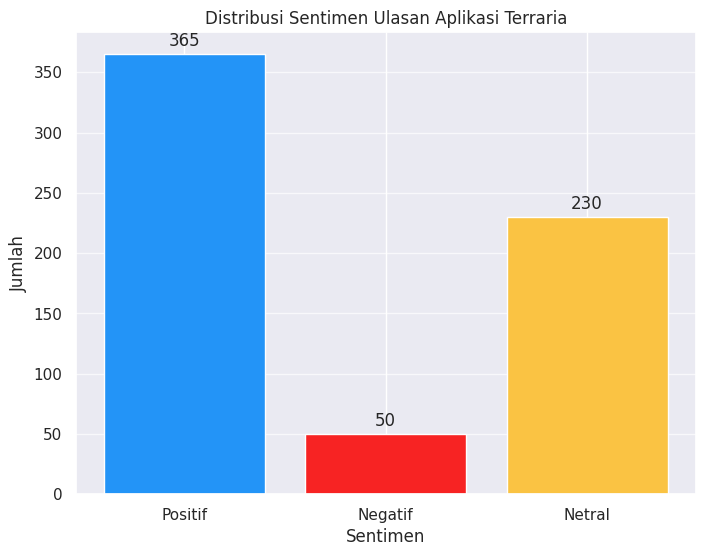

In [36]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Terraria")


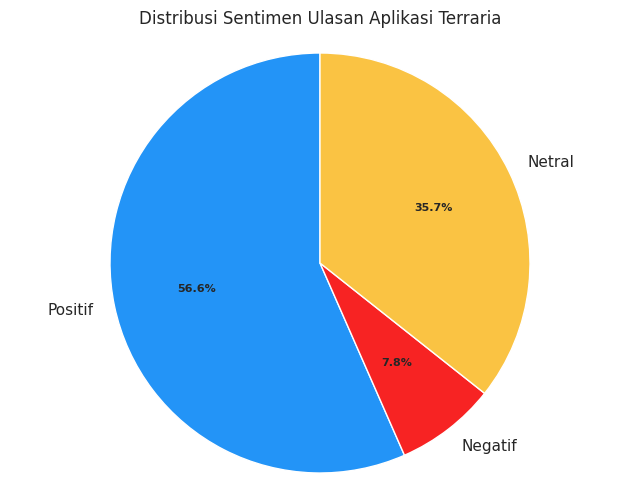

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Terraria")

In [38]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
1,lumayan aplikasi nya,Not bad.,Positif
2,aplikasi nya sangat bagus,The app is very good.,Positif
3,lah ga download mlbb beta download versi full ...,"fontcolor="" # FFFF00""not downloadmlbb beta dow...",Positif
4,mantap min download game ga support,Persistent min download game ga support,Negatif
5,mantap,Steady.,Positif
...,...,...,...
637,download banyak game,download many games,Positif
638,sangat seru,It's very exciting.,Positif
639,kerenn,Cool.,Positif
641,bagus banyak game ku suka di sini,Good. A lot of my games love it here.,Positif


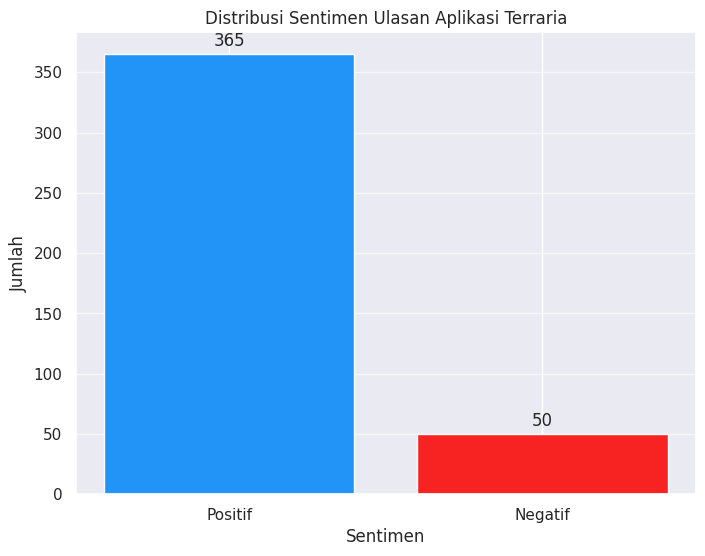

In [39]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Terraria")


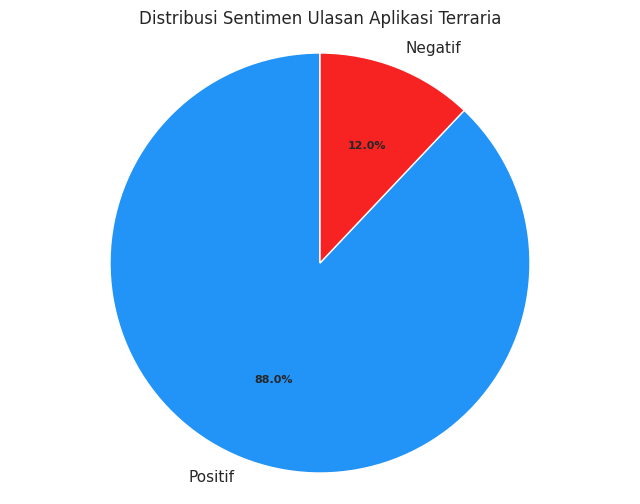

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Terraria")

In [41]:
data = data.replace({'Positif':0, 'Negatif':1})
data

,content,content_en,sentimen
1,lumayan aplikasi nya,Not bad.,0
2,aplikasi nya sangat bagus,The app is very good.,0
3,lah ga download mlbb beta download versi full ...,"fontcolor="" # FFFF00""not downloadmlbb beta dow...",0
4,mantap min download game ga support,Persistent min download game ga support,1
5,mantap,Steady.,0
...,...,...,...
637,download banyak game,download many games,0
638,sangat seru,It's very exciting.,0
639,kerenn,Cool.,0
641,bagus banyak game ku suka di sini,Good. A lot of my games love it here.,0


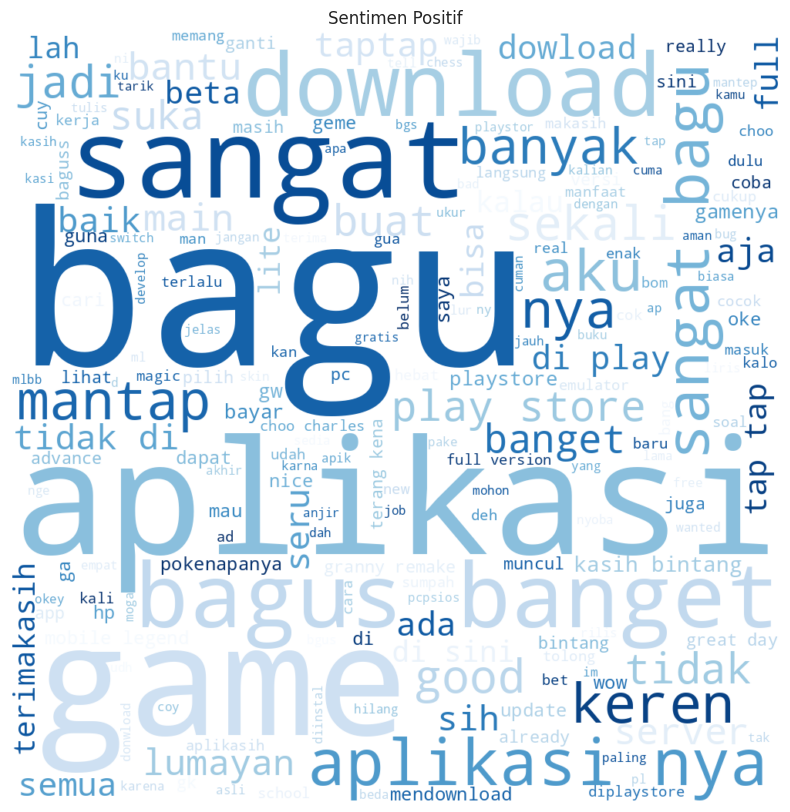

In [42]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data[data['sentimen'] == 0]
data_negatif = data[data['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

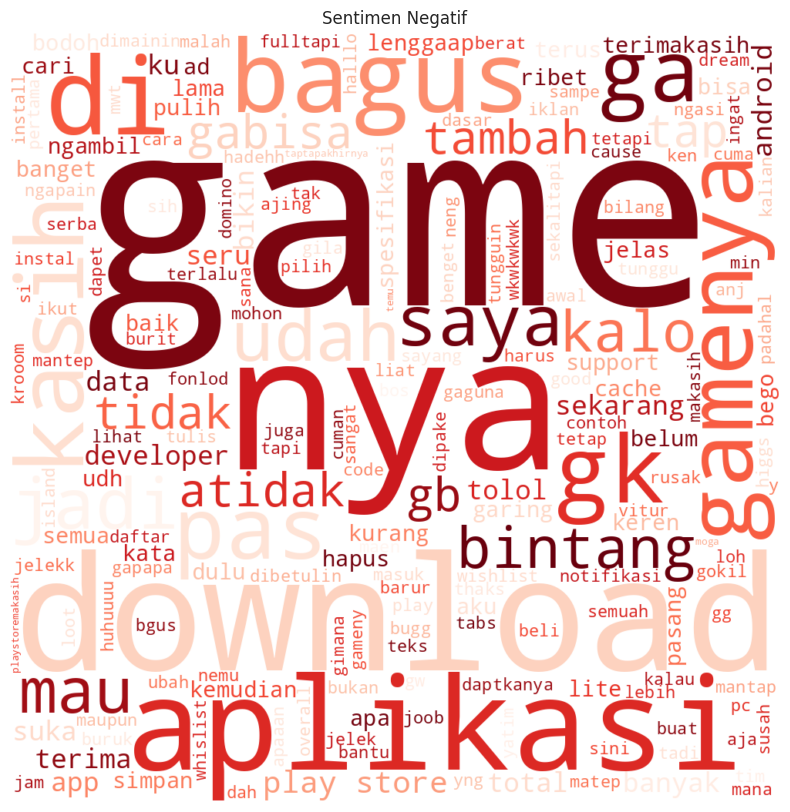

In [43]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

In [44]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
0    365
1     50
Name: count, dtype: int64

# **Data Preparation & Modeling**

In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [52]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [53]:
X_train

390                                                 good
572                                  wow bagus main game
285                             banyak sekali jenis game
224                                            bagus coy
6                                           sangat bagus
                             ...                        
94     bagus banget donwload mobile legend beta makas...
149                                                keren
419                                                bagus
550                                           keren woyy
144                                               mantap
Name: content, Length: 332, dtype: object

In [54]:
# Menggunakan TfidfVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)


TfidfVectorizer()

In [55]:
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [56]:
X_train_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_vec, y_train)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.8674698795180723
Akurasi untuk c = 0.05: 0.8674698795180723
Akurasi untuk c = 0.25: 0.8795180722891566
Akurasi untuk c = 0.5: 0.8795180722891566
Akurasi untuk c = 0.75: 0.8795180722891566
Akurasi untuk c = 1: 0.9156626506024096


In [58]:
linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

In [59]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.9156626506024096 


In [60]:
y_pred = svm.predict(X_test_vec)
print('Accuracy Of SVM Classfier On Test Set: {:.2f}' .format(svm.score(X_test_vec, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))


Accuracy Of SVM Classfier On Test Set: 0.92
[[72  0]
 [ 7  4]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        72
           1       1.00      0.36      0.53        11

    accuracy                           0.92        83
   macro avg       0.96      0.68      0.74        83
weighted avg       0.92      0.92      0.90        83



In [61]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Negatives (TN) = ', cm[0, 0])

print('\nTrue Positives (TP) = ', cm[1, 1])

print('\nFalse Negatives (FN) = ', cm[0, 1])

print('\nFalse Positives (FP) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[72  0]
 [ 7  4]]

True Negatives (TN) =  72

True Positives (TP) =  4

False Negatives (FN) =  0

False Positives (FP) =  7

Accuracy =  0.9156626506024096


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

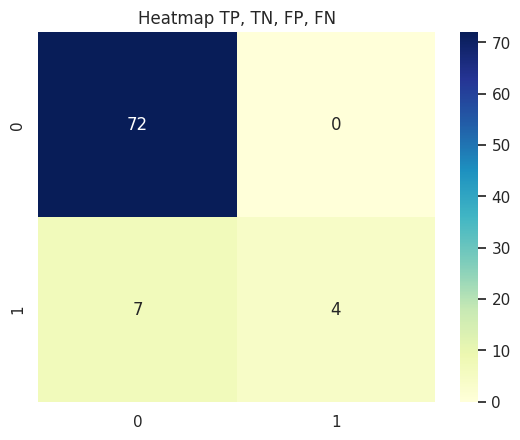

In [62]:
cm_matrix = pd.DataFrame(data=cm, columns=['0' , '1'],
                                 index=['0' , '1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [63]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [64]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9157


In [65]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0843


# **Testing**


In [74]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : bagus banget aplikasinya
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 99.56%
Probabilitas: 99.55733969904828 %


In [78]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : aplikasi tolol, ribet dan jelek
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 91.82%
Probabilitas: 91.82222586150225 %
